# <font color = green>*[미술관에 GAN 딥러닝 실전 프로젝트]*</font>의 museGAN을 구현해봤습니다.

<br/>
<br/>
데이터 -> any midi files
<br/>
악보 소프트웨어[Musescore ] -> https://musescore.org/en [현재 폴더를 경로로 설치할 것!]


# 데이터 핸들링

## 1. 데이터를 악보로 확인하기

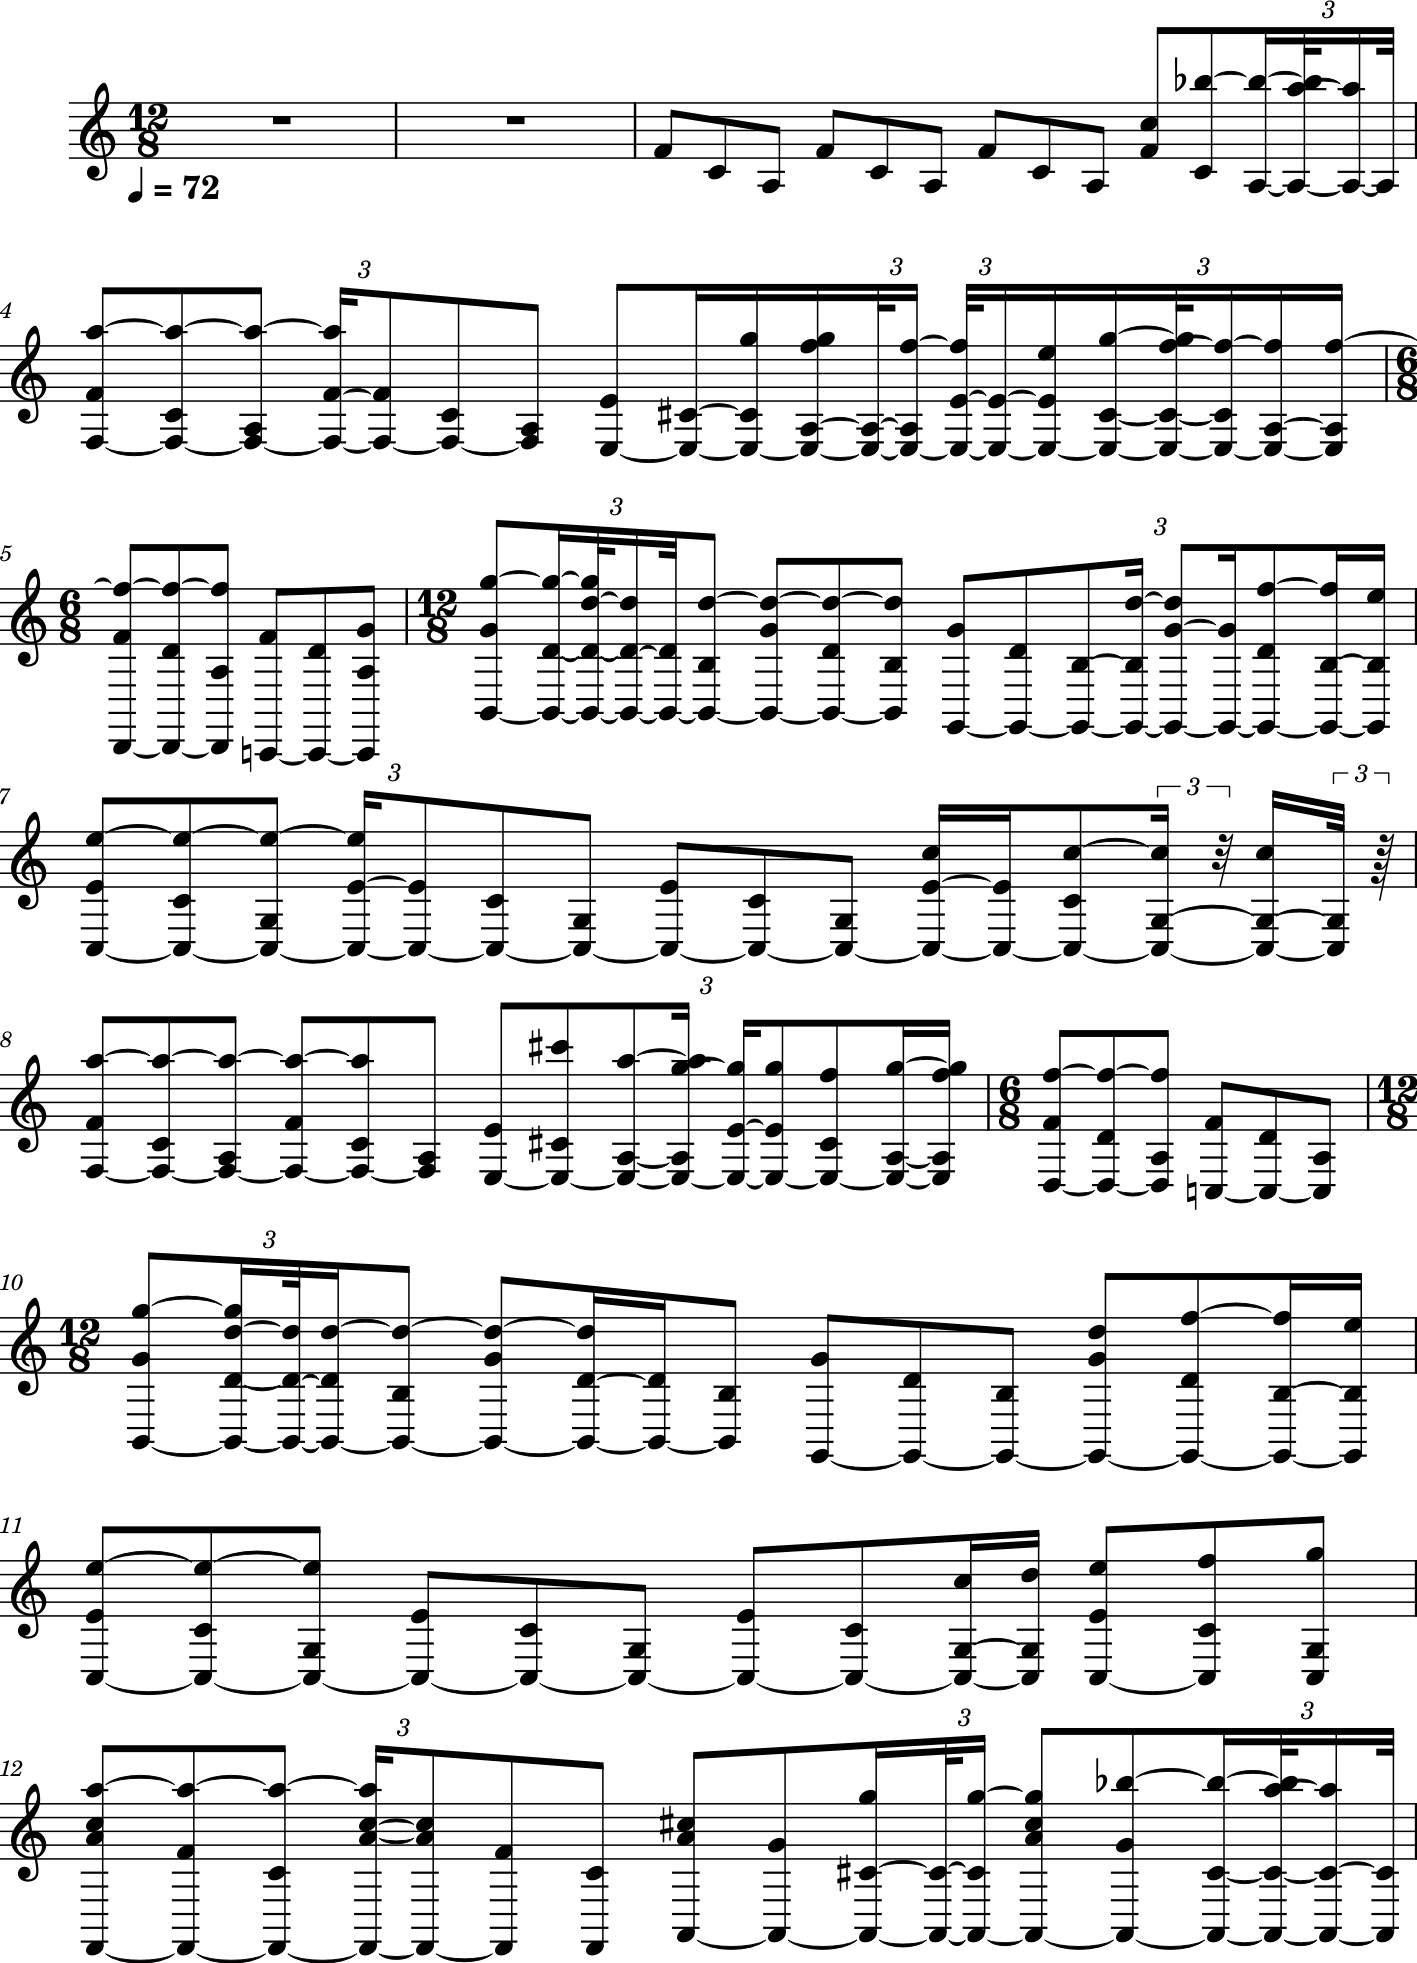

In [1]:
from music21 import *

us = environment.UserSettings()
us['musicxmlPath'] = us['musescoreDirectPNGPath'] = '.\\bin\\MuseScore3.exe'


dataset_name = 'piano'
filename = 'ciari1'
file = "./data/{}/{}.mid".format(dataset_name, filename)

original_score = converter.parse(file).chordify()
original_score.show()

## 2. 데이터를 텍스트로 확인하기

In [2]:
original_score.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Piano 'PIANO: PIANO'>
    {0.0} <music21.instrument.Piano 'Piano'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark andante Quarter=72.0>
    {0.0} <music21.meter.TimeSignature 12/8>
    {0.0} <music21.note.Rest dotted-whole>
{6.0} <music21.stream.Measure 2 offset=6.0>
    {0.0} <music21.note.Rest dotted-whole>
{12.0} <music21.stream.Measure 3 offset=12.0>
    {0.0} <music21.instrument.Piano 'Piano'>
    {0.0} <music21.chord.Chord F4>
    {0.5} <music21.chord.Chord C4>
    {1.0} <music21.chord.Chord A3>
    {1.5} <music21.chord.Chord F4>
    {2.0} <music21.chord.Chord C4>
    {2.5} <music21.chord.Chord A3>
    {3.0} <music21.chord.Chord F4>
    {3.5} <music21.chord.Chord C4>
    {4.0} <music21.chord.Chord A3>
    {4.5} <music21.chord.Chord F4 C5>
    {5.0} <music21.chord.Chord C4 B-5>
    {5.5} <music21.chord.Chord A3 B-5>
    {5.6667} <music21.chord.Chord A3 A5 B-5>
    {5.75} <music21.

## 3. 데이터 추출 (박자, 음정)

In [3]:
notes = []
durations = []

for element in original_score.flat:
    
    if isinstance(element, chord.Chord):
        notes.append('.'.join(n.nameWithOctave for n in element.pitches))
        durations.append(element.duration.quarterLength)

    if isinstance(element, note.Note):
        if element.isRest:
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)
        else:
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)

In [4]:
print('\nduration', 'pitch')
for n,d in zip(notes,durations):
    print(d, '\t', n)


duration pitch
0.5 	 F4
0.5 	 C4
0.5 	 A3
0.5 	 F4
0.5 	 C4
0.5 	 A3
0.5 	 F4
0.5 	 C4
0.5 	 A3
0.5 	 F4.C5
0.5 	 C4.B-5
1/6 	 A3.B-5
1/12 	 A3.A5.B-5
1/6 	 A3.A5
1/12 	 A3
0.5 	 F3.F4.A5
0.5 	 F3.C4.A5
0.5 	 F3.A3.A5
1/6 	 F3.F4.A5
1/3 	 F3.F4
0.5 	 F3.C4
0.5 	 F3.A3
0.5 	 E3.E4
0.25 	 E3.C#4
0.25 	 E3.C#4.G5
0.25 	 E3.A3.F5.G5
1/12 	 E3.A3
1/6 	 E3.A3.F5
1/12 	 E3.E4.F5
1/6 	 E3.E4
0.25 	 E3.E4.E5
0.25 	 E3.C#4.G5
1/12 	 E3.C#4.F5.G5
1/6 	 E3.C#4.F5
0.25 	 E3.A3.F5
0.25 	 E3.A3.F5
0.5 	 D2.F4.F5
0.5 	 D2.D4.F5
0.5 	 D2.A3.F5
0.5 	 C2.F4
0.5 	 C2.D4
0.5 	 C2.A3.G4
0.5 	 B2.G4.G5
1/6 	 B2.D4.G5
1/12 	 B2.D4.D5.G5
1/6 	 B2.D4.D5
1/12 	 B2.D4
0.5 	 B2.B3.D5
0.5 	 B2.G4.D5
0.5 	 B2.D4.D5
0.5 	 B2.B3.D5
0.5 	 G2.G4
0.5 	 G2.D4
1/3 	 G2.B3
1/6 	 G2.B3.D5
1/3 	 G2.G4.D5
1/6 	 G2.G4
0.5 	 G2.D4.F5
0.25 	 G2.B3.F5
0.25 	 G2.B3.E5
0.5 	 C3.E4.E5
0.5 	 C3.C4.E5
0.5 	 C3.G3.E5
1/6 	 C3.E4.E5
1/3 	 C3.E4
0.5 	 C3.C4
0.5 	 C3.G3
0.5 	 C3.E4
0.5 	 C3.C4
0.5 	 C3.G3
0.25 	 C3.E4.C5
0.25 	 C3.E4
0.5 

0.25 	 C3.F3.F4.A4.F5
0.25 	 C3.E-3.F3.E-4.F4.F5.G5
0.25 	 C3.F3.E-4.F4.F5
0.25 	 E2.F2.E-3.F3.F4.C5.E-5.F5.A5
0.25 	 F2.F3.F4.C5.E-5.F5.A5
0.25 	 F2.E-3.G3.G4.A4.G5.B-5
0.25 	 F2.G3.G4.A4.G5.B-5
0.25 	 F2.E-3.A3.E-4.A4.A5.C6
0.25 	 F2.A3.E-4.A4.A5.C6
0.25 	 C2.B-2.E-3.D4.B-4.D5.D6
0.25 	 B-2.D4.B-4.D5.D6
0.25 	 B-2.E-3.D4.F4.D5.D6
0.25 	 B-2.D4.F4.D5.D6
0.25 	 B-2.E-3.D4.D5.D6
0.25 	 B-2.D4.D5.D6
0.25 	 E2.B-2.E-3.D4.B-4.D5.D6
0.25 	 B-2.D4.B-4.D5.D6
0.25 	 B-2.E-3.D4.F4.D5.D6
0.25 	 B-2.D4.F4.D5.D6
0.25 	 C2.B-2.E-3.D4.D5.D6
0.25 	 B-2.D4.D5.D6
0.25 	 C2.A2.E-3.C4.C5.D5.F#5.C6
0.25 	 A2.C4.C5.D5.F#5.C6
0.25 	 A2.E-3.C4.C5.C6
0.25 	 A2.C4.C5.C6
0.25 	 A2.E-3.C4.F#4.C5.C6
1/12 	 A2.C4.F#4.C5.C6
1/6 	 A2.C4.F#4.C5.C6.E-6
1/12 	 D2.E2.E-3.C4.C5.D5.F#5.C6.E-6
1/6 	 D2.E2.E-3.C4.C5.D5.F#5.C6.E-6
0.25 	 D2.C4.C5.D5.F#5.C6.E-6
0.25 	 D2.E-3.C4.C5.C6.E-6
1/12 	 D2.C4.C5.C6.E-6
1/6 	 D2.C4.C5.C6.D6
0.25 	 D2.E-3.C4.F#4.C5.C6.D6
1/12 	 D2.B-3.C4.F#4.B-4.C5.B-5.C6.D6
1/6 	 D2.B-3.C4.F#4.B-4.C5.B

0.25 	 G2.E-3.B3.F5
0.25 	 G2.E-3.B3
0.5 	 C3.E-3.E4.E5
0.25 	 C3.E-3.C4.E5
0.25 	 C3.E-3.C4
0.5 	 C3.E-3.G3
0.5 	 C3.E-3.E4
0.5 	 C3.E-3.C4
0.5 	 C3.E-3.G3
0.5 	 C3.E-3.E4
0.5 	 C3.E-3.C4
1/6 	 C3.E-3.G3
1/12 	 C3.E-3.G3
1/6 	 C3.E-3.G3
1/12 	 C3.E-3.G3
0.25 	 C3.E-3.E4.E5
1/12 	 C3.E-3.E4
1/6 	 C3.E-3.E4
1/6 	 C3.E-3.C4.E5
1/12 	 C3.E-3.C4.E5
1/6 	 C3.E-3.C4
1/12 	 C3.E-3.C4
0.25 	 C3.E-3.G3.E5
0.25 	 C3.G3.E5
0.25 	 C2.C#3.E-3.F3.F4.A4.A5
1/12 	 C2.E-3.F3.F4.A4.A5
1/6 	 C2.E-3.F3.F4.A4.A5
1/6 	 C2.E-3.F3.C4.A4.A5
1/3 	 C2.E-3.F3.C4.A4.A5
1/6 	 C2.E-3.F3.A3.A4.A5
1/3 	 C2.E-3.F3.A3.A4.A5
1/6 	 C2.E2.E-3.F3.F4.A4.A5
1/12 	 C2.E2.E-3.F3.F4.A4.A5
0.25 	 C2.E-3.F3.F4.A4.A5
1/6 	 C2.E-3.F3.C4.A4.A5
1/3 	 C2.E-3.F3.C4.A4.A5
1/6 	 C2.E-3.F3.A3.A4.A5
1/3 	 C2.E-3.F3.A3.A4.A5
1/6 	 C2.E-3.E3.E4.A4.A5
1/12 	 C2.E-3.E3.E4.A4.A5
0.25 	 C2.E-3.E3.E4
1/6 	 C2.E-3.E3.C#4.G4.G5
1/12 	 C2.E-3.E3.C#4.G4.G5
0.25 	 C2.E-3.E3.C#4.G4.G5
1/12 	 C2.E-3.E3.A3.F4.G4.F5.G5
1/12 	 C2.E-3.E3.A3.F4.F5
1/12 	 C2.E

1/6 	 C2.C3.E-3.C4
1/6 	 C2.C3.E-3.G3.G4.G5
1/6 	 C2.C3.E-3.G3.G4.G5
1/6 	 C2.C3.E-3.G3
